*1.PROBLEMİN TANIMI*

---


Kalp hastalıkları, dünya genelinde önde gelen ölüm nedenlerinden biridir ve
erken teşhis, hastaların yaşam kalitesini ve hayatta kalma oranlarını önemli ölçüde artırabilir. Bu projede, makine öğrenimi ve yapay sinir ağları kullanarak kalp hastalığı teşhisinde yardımcı olacak bir model geliştirmeyi amaçlıyoruz. Model, çeşitli hasta verilerini analiz ederek kalp hastalığı riskini tahmin etmeye çalışacaktır.


2. PROJE EKİBİNİN KATKILARI

---


Bu proje, üç kişinin işbirliği ile tamamlanmıştır. Katkılar aşağıdaki gibi dağıtılmıştır:

**1-Lalegül Yıldırım(Araştırma ve veri toplama, veri ön işleme ve analiz:%35):**



*   *Araştırma ve veri toplama:* Projede kullanılan veri setlerinin toplanması ve ilgili literatür taramalarının yapılması.


*  *Veri ön işleme ve analiz:* Veri temizleme, eksik verilerin işlenmesi, temel istatistiksel analizler.






**2-Furkan Karan(Model geliştirme ve eğitimi:%35):**
*    *Model oluşturma:*
TensorFlow kullanılarak yapay sinir ağı modelinin geliştirilmesi.

*   *Model eğitimi:* Eğitim verileri kullanılarak modelin eğitilmesi ve hiperparametre optimizasyonu yapılması.


 **3-Ilgın Çutok(Model değerlendirme ve raporlama: %30):**



*   *Model değerlendirme:* Test verileri üzerinde modelin performansının değerlendirilmesi ve doğruluk, hata oranı gibi metriklerin hesaplanması.
*   *Sonuçların raporlanması:* Model sonuçlarının yorumlanması ve proje raporunun hazırlanması.



*3. ÇÖZÜM İÇİN KULLANILAN YÖNTEMLER*

---


1.   *Veri Toplama ve Yükleme:* Kalp hastalığı için bir veri seti toplanmıştır.
2.   *Veri Ön İşleme:* Verilerin normalizasyonu, eksik değerlerin işlenmesi ve kategorik verilerin kodlanması.
3. *Model Oluşturma:* TensorFlow ve Keras kullanılarak bir yapay sinir ağı modeli geliştirilmiştir
4. *Model Eğitimi:* Eğitim verileri kullanılarak modelin eğitimi yapılmıştır.
5. *Model Değerlendirme:* Test verileri üzerinde modelin performansının değerlendirilmesi ve doğruluk, hata oranı gibi metriklerin hesaplanması.

In [1]:
# Gerekli kütüphanelerin yüklenmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense


In [2]:
dataframe = pd.read_csv(r"/content/ah_kalbim.csv")


In [3]:
print(dataframe.isnull().sum())

yas                            0
cinsiyet                       0
gogus_agrı_tipi                0
dinlenme_kan_basıncı           0
Kolesterol                     0
Aclık_Kan_Sekeri               0
Elektrokardiyografik_Ölcümü    0
Ulasılan_maks_kalp_hızı        0
egzersize_baglı_durumu         0
depresyon_ST                   0
egim                           0
ca                             0
talasemi                       0
sonuc                          0
dtype: int64


In [ ]:
dataframe.describe()


,yas,cinsiyet,gogus_agrı_tipi,dinlenme_kan_basıncı,Kolesterol,Aclık_Kan_Sekeri,Elektrokardiyografik_Ölcümü,Ulasılan_maks_kalp_hızı,egzersize_baglı_durumu,depresyon_ST,egim,ca,talasemi,sonuc
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
print(dataframe.corr()["sonuc"].sort_values())


egzersize_baglı_durumu        -0.436757
depresyon_ST                  -0.430696
ca                            -0.391724
talasemi                      -0.344029
cinsiyet                      -0.280937
yas                           -0.225439
dinlenme_kan_basıncı          -0.144931
Kolesterol                    -0.085239
Aclık_Kan_Sekeri              -0.028046
Elektrokardiyografik_Ölcümü    0.137230
egim                           0.345877
Ulasılan_maks_kalp_hızı        0.421741
gogus_agrı_tipi                0.433798
sonuc                          1.000000
Name: sonuc, dtype: float64


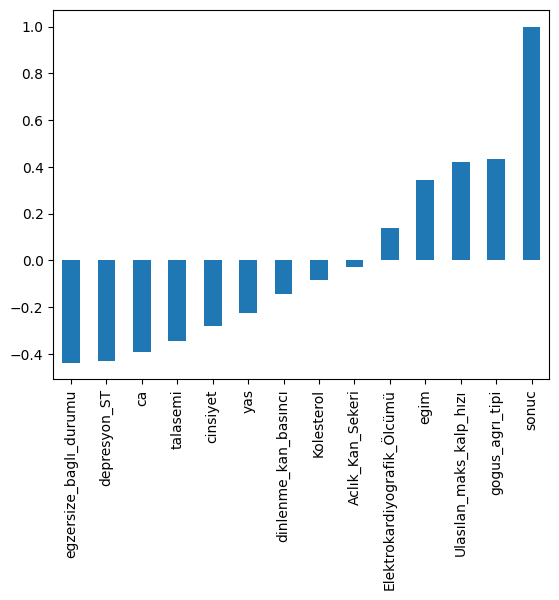

In [6]:
dataframe.corr()["sonuc"].sort_values().plot(kind="bar")
plt.show()


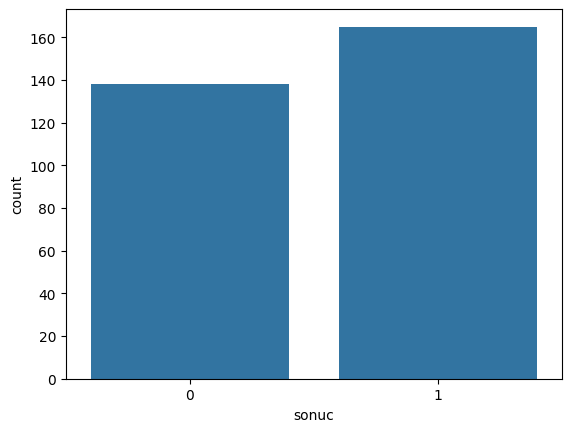

In [7]:
sbn.countplot(x="sonuc", data=dataframe)
plt.show()


In [8]:
# Kategorik verilerin one-hot encoding ile dönüştürülmesi
dataframe = pd.get_dummies(dataframe, columns=["gogus_agrı_tipi", "Elektrokardiyografik_Ölcümü", "egim", "talasemi"], drop_first=True)


In [9]:
# Hedef ve özellik değişkenlerinin ayrılması
y = dataframe["sonuc"].values
x = dataframe.drop("sonuc", axis=1).values


In [10]:
# Özelliklerin standardizasyonu
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [11]:
# Veri setinin eğitim ve test setlerine bölünmesi
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=3)


In [12]:
from tensorflow.keras.regularizers import l2


In [13]:
# Modelin oluşturulması
model = Sequential()
model.add(Dense(16, activation="relu", kernel_regularizer=l2(0.01), input_shape=(x_train.shape[1],)))
model.add(Dense(16, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dense(16, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation="sigmoid"))


In [14]:
# Modelin derlenmesi
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [15]:
# Modelin eğitilmesi
history = model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=200, verbose=1)


Epoch 1/200
7/7 [==============================] - 1s 47ms/step - loss: 1.2561 - accuracy: 0.4680 - val_loss: 1.2250 - val_accuracy: 0.4300
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 1.2070 - accuracy: 0.4680 - val_loss: 1.1807 - val_accuracy: 0.4300
Epoch 3/200
7/7 [==============================] - 0s 8ms/step - loss: 1.1674 - accuracy: 0.4680 - val_loss: 1.1449 - val_accuracy: 0.4300
Epoch 4/200
7/7 [==============================] - 0s 8ms/step - loss: 1.1358 - accuracy: 0.4778 - val_loss: 1.1139 - val_accuracy: 0.4300
Epoch 5/200
7/7 [==============================] - 0s 8ms/step - loss: 1.1069 - accuracy: 0.5074 - val_loss: 1.0868 - val_accuracy: 0.4600
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 1.0811 - accuracy: 0.6059 - val_loss: 1.0610 - val_accuracy: 0.5400
Epoch 7/200
7/7 [==============================] - 0s 10ms/step - loss: 1.0557 - accuracy: 0.6256 - val_loss: 1.0365 - val_accuracy: 0.6400
Epoch 8/200
7/7 [=======

In [16]:
# Modelin kaydedilmesi
model.save("kalp_hastaligi_modeli.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


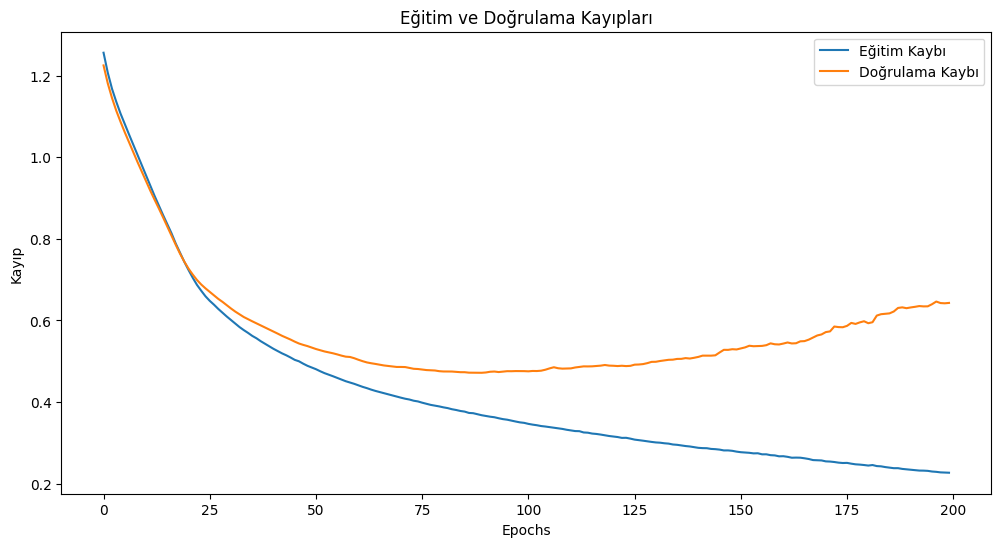

In [18]:
# Eğitim kayıplarının görselleştirilmesi
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kayıpları')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()
plt.show()


In [20]:
# Modelin değerlendirilmesi
tahmin_olasiliklari = model.predict(x_test)
tahmin = (tahmin_olasiliklari > 0.5).astype(int)

4/4 [==============================] - 0s 3ms/step


In [21]:
print(classification_report(y_test, tahmin))
print(confusion_matrix(y_test, tahmin))


              precision    recall  f1-score   support

           0       0.78      0.74      0.76        43
           1       0.81      0.84      0.83        57

    accuracy                           0.80       100
   macro avg       0.80      0.79      0.79       100
weighted avg       0.80      0.80      0.80       100

[[32 11]
 [ 9 48]]


In [22]:
# ROC-AUC skoru ve eğrisi
roc_auc = roc_auc_score(y_test, tahmin_olasiliklari)
fpr, tpr, thresholds = roc_curve(y_test, tahmin_olasiliklari)

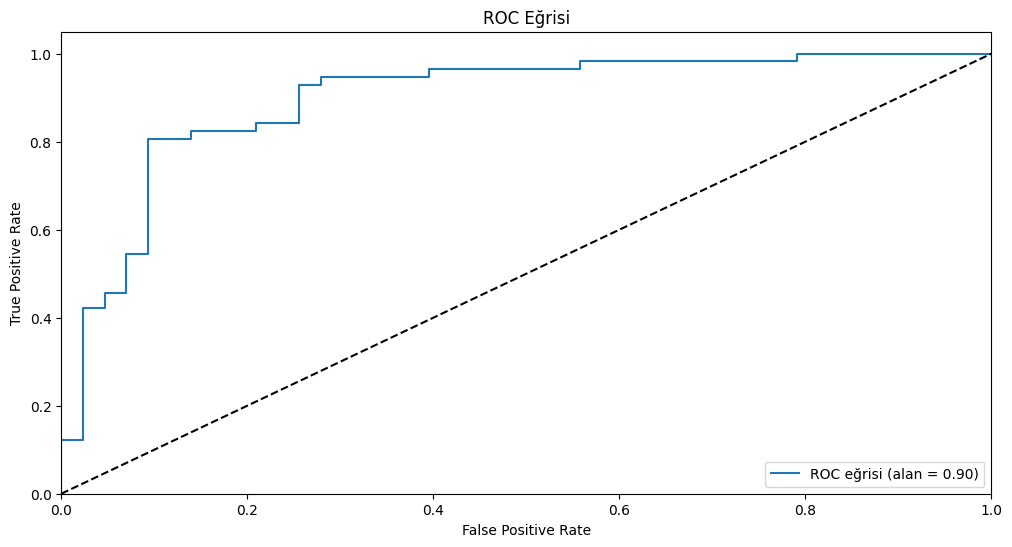

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, label='ROC eğrisi (alan = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()


In [24]:
# Modelin yüklenmesi
loaded_model = load_model("kalp_hastaligi_modeli.h5")

In [25]:
# Yüklenen model ile tahmin yapılması
yeni_tahminler = loaded_model.predict(x_test)
yeni_tahminler = (yeni_tahminler > 0.5).astype(int)



4/4 [==============================] - 0s 3ms/step


In [26]:
# Tahminlerin çıktısı
print(yeni_tahminler)

[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]
